In [47]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.colors
import os
import numpy as np
import math
import cmath

In [32]:
paths = dict([(a,"/home/jsk/cylinder/fixed_surfaces/n1k10a"+str(a)) for a in range(10)])

In [33]:
alphas =[x for x in range(-5,2)]
cs =[x for x in np.arange(.5,9,1)]

In [34]:
def sort_csv(filename, dtype=float, fct=(lambda x: abs(x))):
    if dtype==complex:
        dtype = str
        data=pd.read_csv(filename, index_col=0)
        data=data.applymap(complex)
        data=data.applymap(lambda x: fct(x))
    else:
        data=pd.read_csv(filename, index_col=0, dtype=dtype)
    data.columns = data.columns.astype("float")
    data.index = data.index.astype("float")
    pd.DataFrame.sort_index(data, axis=0, inplace=True)
    pd.DataFrame.sort_index(data, axis=1, inplace=True)
    return data


In [35]:
def complex_array_to_rgb(X, theme='dark', rmax=None):
    '''Takes an array of complex number and converts it to an array of [r, g, b],
    where phase gives hue and saturaton/value are given by the absolute value.
    Especially for use with imshow for complex plots.'''
    absmax = rmax or np.abs(X).max()
    Y = np.zeros(X.shape + (3,), dtype='float')
    Y[..., 0] = np.angle(X) / (2 * math.pi) % 1
    if theme == 'light':
        Y[..., 1] = np.clip(np.abs(X) / absmax, 0, 1)
        Y[..., 2] = 1
    elif theme == 'dark':
        Y[..., 1] = 1
        Y[..., 2] = np.clip(np.abs(X) / absmax, 0, 1)
    Y = matplotlib.colors.hsv_to_rgb(Y)
    return Y

def complex_heatmap(filename, theme='dark', rmax=None):
    data=pd.read_csv(filename, index_col=0)
    data.columns = data.columns.astype("float")
    data.index = data.index.astype("float")
    pd.DataFrame.sort_index(data, axis=0, inplace=True)
    pd.DataFrame.sort_index(data, axis=1, inplace=True)
    data=data.applymap(complex)
    plt.imshow(complex_array_to_rgb(data, theme, rmax))
    
def complex_heatmap_2(filename, theme='dark', rmax=None):
    data=pd.read_csv(filename, index_col=0)
    data.columns = data.columns.astype("float")
    data.index = data.index.astype("float")
    pd.DataFrame.sort_index(data, axis=0, inplace=True)
    pd.DataFrame.sort_index(data, axis=1, inplace=True)
    data=data.applymap(complex)
    return data.transpose()

In [36]:
field_energies = dict([(a,sort_csv(os.path.join(paths[a], "field_energy.csv"), dtype=complex)) for a in paths])

In [37]:
minimum_as = dict([])
minimum_Es = dict([])
for alpha in alphas:
    minimum_as_row = dict([])
    minimum_Es_row = dict([])
    for c in cs:
        energies = [(field_energies[a].loc[c, alpha],a) for a in paths]
        energy, a = min(energies)
        minimum_as_row[c]= a
        minimum_Es_row[c] = energy
    minimum_as[alpha]=minimum_as_row
    minimum_Es[alpha] = minimum_Es_row
minimum_as = pd.DataFrame(minimum_as)
minimum_Es = pd.DataFrame(minimum_Es)

<AxesSubplot:>

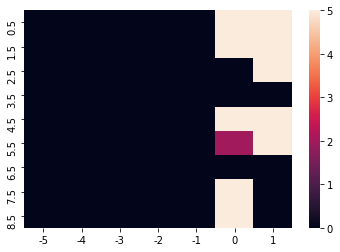

In [38]:
sb.heatmap(minimum_as)

<AxesSubplot:>

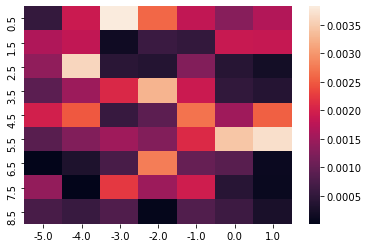

In [39]:
sb.heatmap(field_energies[0])

Should be all 0 - do again with step_lattice_all()

<AxesSubplot:>

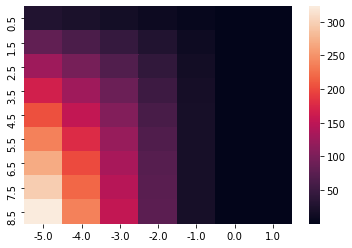

In [40]:
sb.heatmap(field_energies[8])

<AxesSubplot:>

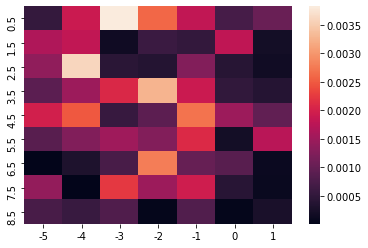

In [41]:
sb.heatmap(minimum_Es)

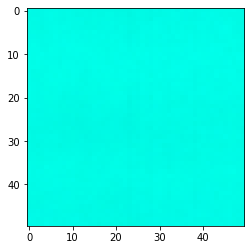

In [42]:
complex_heatmap(os.path.join(paths[3],"alpha_-5.0_C_3.5_snapshot.csv"))

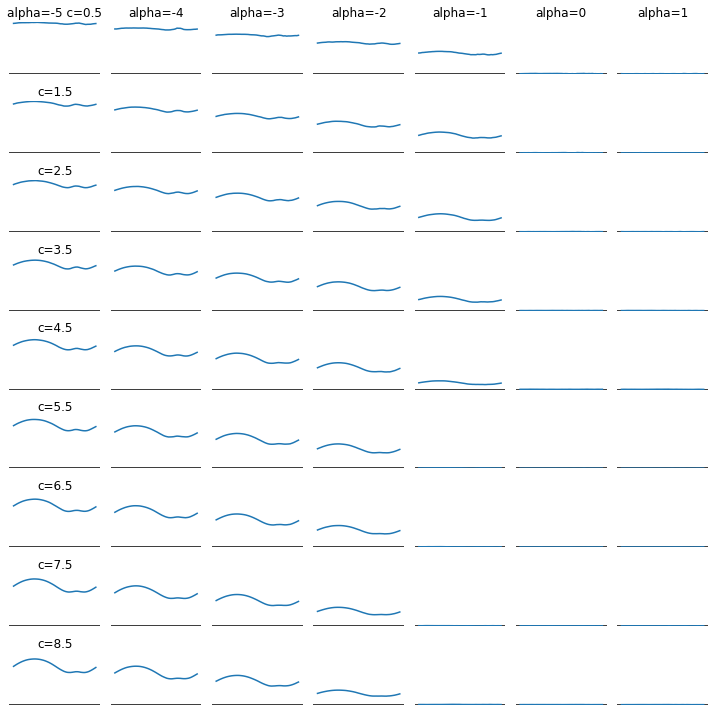

In [43]:
nrows, ncols = field_energies[0].shape
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, sharex=False, figsize=(10,10))

a=9

for ax, params in zip(axs.flat, [(alpha,c) for c in cs for alpha in alphas ]):
    alpha,c= params
    #print(params)
    filename="alpha_"+str(round(alpha,2))+".0_C_"+str(round(c,2))+"_profile_abs.csv"
    #print(filename)
    profile= pd.read_csv(os.path.join(paths[a], filename), index_col=0)
    ax.set_ylim((0,math.sqrt(5)))
    ax.axis('off')
    ax.axhline(y=0, color='black')
    ax.plot(profile)
    if c==cs[0]:
        ax.set_title("alpha="+str(alpha))
        if alpha==alphas[0]:
            ax.set_title("alpha="+str(alpha)+" c="+str(c))
    elif alpha==alphas[0]:
        ax.set_title("c="+str(c))
    #plt.show()

plt.tight_layout()
#pp.savefig()
#plt.show()
#pp.close()
#plt.savefig("profiles_example_k1a8.png")

In [15]:
#entering states by hand
descriptions = dict([])
descriptions[9] = [[3,3,3,3,3,'x','x'], [3,3,3,'x','x','x','x'],
                  [3,3,'x','x','x','x','x'], ['x','x','x','x','x','x','x'],
                   ['x','x','x','x','x','x','x'], ['x','x','x','x','x','x','x'],
                   ['x','x','x','x','x','x','x'], ['x','x','x','x','x','x','x'],  
                   ['x','x','x','x','x','x','x']]
descriptions[8] = [[(3,2),3,(2,3),3,3,'x','x'], [3,3,3,'x','x','x','x'],
                  [3,3,'x','x','x','x','x'], ['x','x','x','x','x','x','x'],
                   ['x','x','x','x','x','x','x'], ['x','x','x','x','x','x','x'],
                   ['x','x','x','x','x','x','x'], ['x','x','x','x','x','x','x'],  
                   ['x','x','x','x','x','x','x']]
descriptions[7] = [[3,3,(2,3),(3,2),3,'x','x'], [3,3,3,'x','x','x','x'],
                  [3,(3,2),'x','x','x','x','x'], [3,'x','x','x','x','x','x'],
                   ['x','x','x','x','x','x','x'], ['x','x','x','x','x','x','x'],
                   ['x','x','x','x','x','x','x'], ['x','x','x','x','x','x','x'],  
                   ['x','x','x','x','x','x','x']]
descriptions[6] = [[2,2,2,2,2,'x','x'], [2,2,2,'x','x','x','x'],
                  [2,2,'x','x','x','x','x'], [2,'x','x','x','x','x','x'],
                   ['x','x','x','x','x','x','x'], ['x','x','x','x','x','x','x'],
                   ['x','x','x','x','x','x','x'], ['x','x','x','x','x','x','x'],  
                   ['x','x','x','x','x','x','x']]
descriptions[5] = [[(2,1),(2,1),2,2,2,'x','x'], [2,2,2,2,'x','x','x'],
                  [2,2,2,'x','x','x','x'], [2,2,'x','x','x','x','x'],
                   [2,'x','x','x','x','x','x'], ['x','x','x','x','x','x','x'],
                   ['x','x','x','x','x','x','x'], ['x','x','x','x','x','x','x'],  
                   ['x','x','x','x','x','x','x']]
descriptions[4] = [[2,(2,1),(1,2),(1,2),2,'x','x'], [2,2,2,2,'x','x','x'],
                  [(2,1),(2,1),2,'x','x','x','x'], [2,2,'x','x','x','x','x'],
                   [2,'x','x','x','x','x','x'], ['x','x','x','x','x','x','x'],
                   ['x','x','x','x','x','x','x'], ['x','x','x','x','x','x','x'],  
                   ['x','x','x','x','x','x','x']]
descriptions[3] = [[1,1,1,(1,2),1,'x','x'], [1,1,1,1,'x','x','x'],
                  [1,1,1,'x','x','x','x'], [1,1,'x','x','x','x','x'],
                   [1,1,'x','x','x','x','x'], [1,'x','x','x','x','x','x'],
                   ['x','x','x','x','x','x','x'], ['x','x','x','x','x','x','x'],  
                   ['x','x','x','x','x','x','x']]
descriptions[2] = [[1,1,1,0,1,'x','x'], [0,0,(1,0),1,'x','x','x'],
                  [1,1,1,'x','x','x','x'], [0,1,'x','x','x','x','x'],
                   [1,1,'x','x','x','x','x'], [1,1,'x','x','x','x','x'],
                   [1,'x','x','x','x','x','x'], ['x','x','x','x','x','x','x'],  
                   ['x','x','x','x','x','x','x']]
descriptions[1] = [[0,0,0,0,0,'x','x'], [0,0,0,0,0,'x','x'],
                  [0,0,0,0,0,'x','x'], [0,0,0,0,0,'x','x'],
                   [0,0,0,0,'x','x','x'], [0,0,0,0,'x','x','x'],
                   [0,0,0,0,'x','x','x'], [0,0,0,'x','x','x','x'],  
                   [0,0,0,'x','x','x','x']]
descriptions[0] = [[0,0,0,0,0,'x','x'], [0,0,0,0,0,'x','x'],
                  [0,0,0,0,0,'x','x'], [0,0,0,0,0,'x','x'],
                   [0,0,0,0,'x','x','x'], [0,0,0,0,'x','x','x'],
                   [0,0,0,0,'x','x','x'], [0,0,0,'x','x','x','x'],  
                   [0,0,0,'x','x','x','x']]

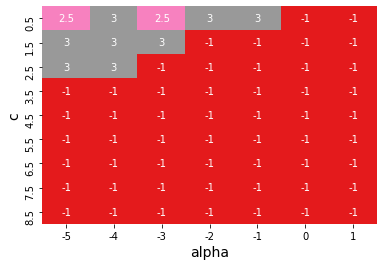

In [16]:
def labels_to_number(arr):
    ans=np.zeros((len(arr), len(arr[0])))
    for (i,row) in enumerate(arr):
        for (j,d) in enumerate(row):
            if d=='x':
                ans[i,j]=-1
            elif type(d)==tuple:
                ans[i,j]=(d[0]+d[1])/2
            else:
                ans[i,j]=d
    return pd.DataFrame(ans, index=np.arange(0.5, 9,1), columns=range(-5,2))
sb.heatmap(labels_to_number(descriptions[8]), annot=True, cbar=False, cmap='Set1')
plt.xlabel("alpha", fontsize=14)
plt.ylabel("c", fontsize=14)
plt.savefig("descriptions_example_k10a8.png")

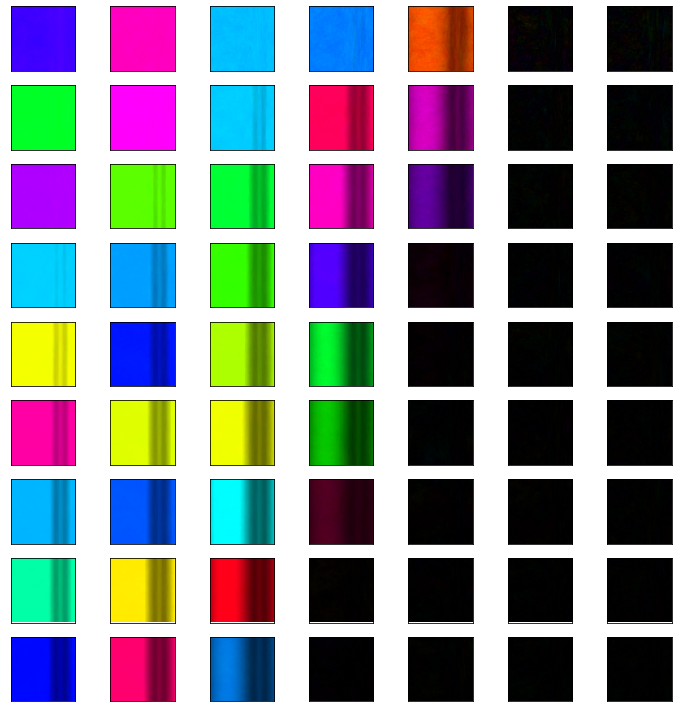

In [44]:
nrows, ncols = field_energies[0].shape
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, sharex=False, figsize=(10,10))

a=9

for ax, params in zip(axs.flat, [(alpha,c) for c in cs for alpha in alphas]):
    alpha,c= params
    #print(params)
    try:
        filename=os.path.join(paths[a], "alpha_"+str(round(alpha,2))+".0_C_"+str(round(c,2))+"_snapshot.csv")
        #print(filename)
        heatmap= complex_heatmap_2(filename)
        ax.imshow(complex_array_to_rgb(heatmap, theme='dark', rmax=1))
    except FileNotFoundError:
        pass
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

plt.tight_layout()
#pp.savefig()
#plt.show()
#pp.close()
#plt.savefig("complex_examples_k10a8.png")

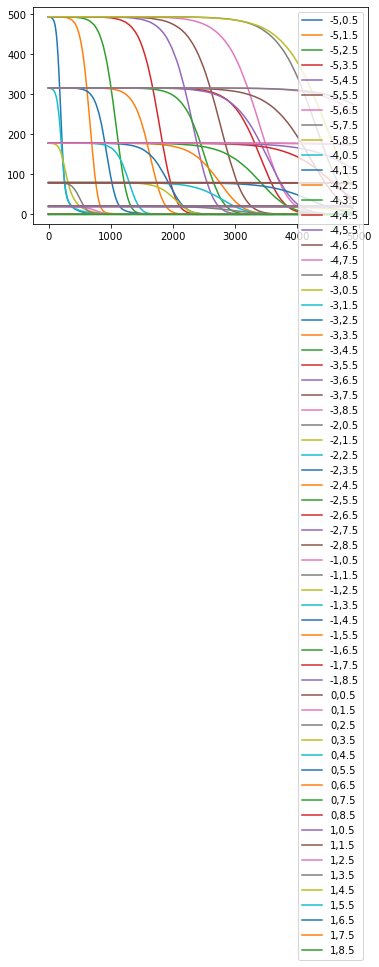

In [232]:
p=paths[0]
subject="field_energy"
for alpha in alphas[:]:
    for c in cs[:]:
        try:
            time_data= pd.read_csv(p+"/alpha_"+str(alpha)+".0_C_"+str(c)+".csv")
            plt.plot([x*1 for x in time_data.loc[100:,subject]], label=str(alpha)+','+str(c))
        except FileNotFoundError:
            print(p+"/alpha_"+str(alpha)+".0_C_"+str(c)+".csv")
            pass
plt.legend()
plt.show()

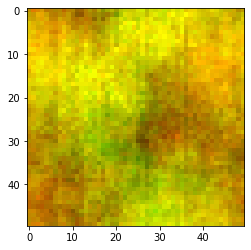

In [219]:
complex_heatmap(os.path.join(paths[1],"alpha_-3.0_C_4.5_snapshot.csv"))

In [1]:
nrows, ncols = 1, 10
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, sharex=False, figsize=(12,4))

alpha=-1
c=4.5

for ax, params in zip(axs.flat, [a for a in range(10)]):
    a=params
    try:
        filename=os.path.join(paths[a], "alpha_"+str(round(alpha,2))+".0_C_"+str(round(c,2))+"_snapshot.csv")
        #print(filename)
        heatmap= complex_heatmap_2(filename)
        ax.imshow(complex_array_to_rgb(heatmap, theme='dark', rmax=1))
        ax.set_title("a="+str(a))
    except FileNotFoundError:
        filename=os.path.join(paths[a], "alpha_"+str(round(alpha,2))+".0_C_"+str(round(c,2))+"_snapshot.csv")
        print(filename)
        pass
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

plt.tight_layout()
#pp.savefig()
#plt.title("Patterns for varying shape amplitude at k=1, alpha=-5, c=1.5")
#plt.show()
#plt.savefig("pattterns_k1alpha-4c3p5.png")

NameError: name 'plt' is not defined

In [45]:
surfdatatens=pd.read_csv("chapter2data/surfenergytens.csv", index_col=0)
surfdatatens

,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2
0.0,31.415927,20.943951,15.707963,12.566371,10.471976,8.975979,7.853982,6.981317,6.283185,5.711987,5.235988
0.1,31.340798,20.896463,15.675075,12.542864,10.455242,8.964527,7.846878,6.977940,6.283098,5.714871,5.241606
0.2,31.118597,20.755887,15.577570,12.473002,10.405300,8.930086,7.825168,6.967105,6.281832,5.722216,5.256835
0.3,30.758515,20.527687,15.418832,12.358730,10.322969,8.872507,7.787817,6.946938,6.276688,5.730493,5.277303
0.4,30.274725,20.220337,15.204171,12.203193,10.209704,8.791816,7.733573,6.914987,6.264059,5.734965,5.297151
0.5,29.684931,19.844510,14.940386,12.010563,10.067667,8.688504,7.661452,6.868928,6.240368,5.730861,5.310462
0.6,29.008736,19.412145,14.635234,11.785805,9.899717,8.563716,7.571137,6.807146,6.202826,5.714318,5.312379
0.7,28.266115,18.935550,14.296890,11.534372,9.709301,8.419308,7.463161,6.729042,6.149849,5.682881,5.299679
0.8,27.476153,18.426637,13.933444,11.261889,9.500265,8.257752,7.338890,6.635069,6.081123,5.635594,5.270860
0.9,26.656162,17.896361,13.552515,10.973856,9.276619,8.081942,7.200349,6.526564,5.997432,5.572792,5.225903


Text(0.5, 0, 'a')

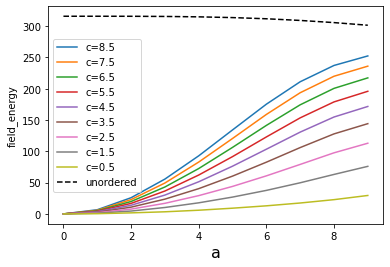

In [50]:
a_s = range(0,10)
alpha_=-4
k=1.0
for alpha,c in [(alpha_,c) for c in cs[::-1]]:
    plt.plot(a_s, [field_energies[a].loc[c,alpha] for a in a_s], label="c="+str(c))
plt.plot(a_s, [.5*alpha**2*surfdatatens.loc[a/10, str(k)]*2*math.pi for a in a_s], label="unordered", 
         linestyle = '--',color='black')
plt.legend(fontsize=10)
plt.ylabel("field_energy")
plt.xlabel("a", fontsize=16)